# Eurostat Digital Landscape Analysis
## Exploring the Relationship Between Internet Access and ICT Sector Development in European Countries
#### Dataset 1: Households with internet access (Last Update: 16/06/24 23:00:00)
Shows the proportion of households in each European country that have access to the internet at home. This is a key indicator of a country's digital infrastructure and the population's ability to participate in the digital economy.

https://ec.europa.eu/eurostat/databrowser/view/tin00134/default/table?lang=en&category=t_isoc.t_isoc_i.t_isoc_ici

#### Dataset 2: Employment in information and communication technology (ICT) sectors (Last Update: 23/04/24 23:00:00)
Shows the percentage of the workforce employed in ICT-related jobs in each European country.

https://ec.europa.eu/eurostat/databrowser/view/tin00085/default/table?lang=en&category=t_isoc.t_isoc_se


## Potential insights:

- Digital divide: This analysis could highlight disparities in digital infrastructure and tech sector development across Europe.
- Policy effectiveness: Countries with high internet access but low tech employment might need to focus on education or attracting tech companies. Conversely, countries with lower internet access but thriving tech sectors might have effective policies for nurturing tech talent.
- Future potential: Countries with high internet access but currently low tech employment might represent untapped potential for tech sector growth.
- Infrastructure investment impact: By looking at changes over time, we might see how investments in internet infrastructure correlate with growth in tech sector employment.
- Remote work implications: In the context of increasing remote work, countries with high internet access might be well-positioned to attract tech jobs, even if their current tech employment is low.

- This analysis could be valuable for policymakers, investors, and educators in understanding the relationship between digital infrastructure and the tech job market across Europe. It could inform decisions about infrastructure investment, education initiatives, and strategies for tech sector development.

In [1]:
# Import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate
import statsmodels.api as sm

# Load the data
df_iaccess = pd.read_csv('tin00134_page_linear.csv.gz') # Eurostat Data: Level of Internet Access per - households
df_ictemp = pd.read_csv('tin00085_linear.csv.gz') # Eurostat Data: Percentage of the ICT personnel on total employment

## 1. Analysis
### Correlation study:
I am going to calculate the correlation coefficient between these two variables. A strong positive correlation might suggest that better internet access is associated with higher employment in tech sectors.
The next step is a scatter plot visualization of the two variables:
Plotting countries on a graph with internet access on one axis and tech employment on the other could reveal interesting patterns or outliers.

In [2]:
# DATA CLEANING
# Inspect the data
print('Dataset 1: Internet Access\n')
print(df_iaccess.info())

print('\nDataset 2: ICT Employment\n')
print(df_ictemp.info())

# Keep the relevant columns

df_iaccess_clean = df_iaccess[['freq', 'unit', 'hhtyp', 'geo', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG']]
df_ictemp_clean = df_ictemp[['freq', 'nace_r2', 'geo', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG']]

# Inspect the data
print('\nDataset 1: Internet Access\n', tabulate(df_iaccess_clean.head(), headers='keys', tablefmt='pretty'))
print('\nDataset 2: ICT Employment\n', tabulate(df_ictemp_clean.head(), headers='keys', tablefmt='pretty'))

Dataset 1: Internet Access

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     422 non-null    object 
 1   LAST UPDATE  422 non-null    object 
 2   freq         422 non-null    object 
 3   unit         422 non-null    object 
 4   hhtyp        422 non-null    object 
 5   geo          422 non-null    object 
 6   TIME_PERIOD  422 non-null    int64  
 7   OBS_VALUE    421 non-null    float64
 8   OBS_FLAG     11 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 29.8+ KB
None

Dataset 2: ICT Employment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     1100 non-null   object 
 1   LAST UPDATE  1100 non-null   object 
 2   freq         1100 non-null   ob

In [3]:
# Further investigation on ICT employment data
nace_r2_categories = np.sort(df_ictemp_clean['nace_r2'].unique())
print('NACE Rev Categories:' , nace_r2_categories)

NACE Rev Categories: ['C_ICT' 'G-U_ICT' 'ICT']


The column `'nace_r2'` represents categories within the ICT sector according to NACE Rev and consists of 3 unique values:

https://ec.europa.eu/eurostat/documents/3859598/5902521/KS-RA-07-015-EN.PDF212 

- C_ICT (ICT Manufacturing)

such as: Manufacture of electronic components and boards, computers and peripheral equipment, communication equipment, consumer electronics, magnetic and optical media, etc.

- G-U_ICT (ICT Services)

such as: Wholesale of information and communication equipment, Software publishing, Telecommunications, Computer programming, Data processing, Repair of computers and communication equipment, etc.

- IC_ICT + G-U_ICT = ICT (Total ICT Sector)

In this analysis we focus on the Total ICT Sector. Therefore we just select those values with 'ICT'.

In [4]:
# Select the rows with the value 'ICT' in the column ['nace_r2']
df_ictemp_clean = df_ictemp_clean[df_ictemp_clean['nace_r2']=='ICT']
df_ictemp_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 734 to 1099
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   freq         366 non-null    object 
 1   nace_r2      366 non-null    object 
 2   geo          366 non-null    object 
 3   TIME_PERIOD  366 non-null    int64  
 4   OBS_VALUE    285 non-null    float64
 5   OBS_FLAG     139 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 20.0+ KB


Correlation coefficient: 0.55


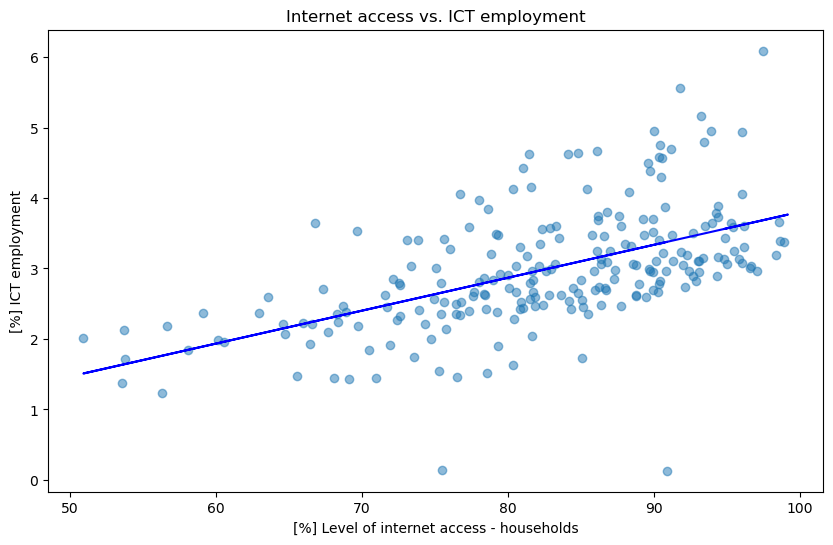

In [5]:
# Merge the dataframes
df_merge = pd.merge(df_iaccess_clean, df_ictemp_clean, on=['TIME_PERIOD', 'geo'], how='inner')

# Calculate correlation
correlation = df_merge['OBS_VALUE_x'].corr(df_merge['OBS_VALUE_y'])
print(f"Correlation coefficient: {correlation:.2f}")

# Linear Regression
model = sm.OLS.from_formula('OBS_VALUE_y ~ OBS_VALUE_x', df_merge)
results = model.fit()
intercept = results.params[0]
slope = results.params[1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merge['OBS_VALUE_x'], df_merge['OBS_VALUE_y'], alpha=0.5)
# Create a linear regression line
plt.plot(df_merge['OBS_VALUE_x'], intercept + slope * df_merge['OBS_VALUE_x'], 'blue', label='fitted line')
plt.xlabel('[%] Level of internet access - households')
plt.ylabel('[%] ICT employment')
plt.title('Internet access vs. ICT employment')
plt.show()


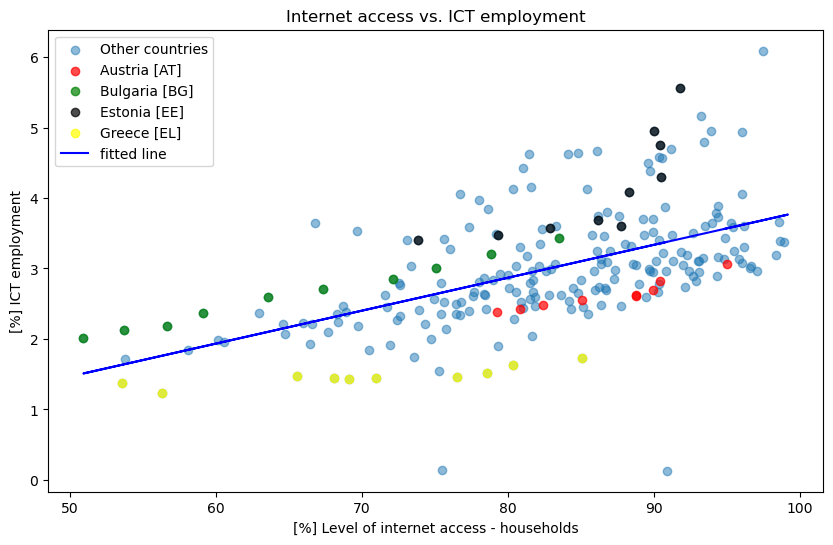

In [6]:
# Create a mask for selected countries
austria_mask = df_merge['geo'] == 'AT'
bulgaria_mask = df_merge['geo'] == 'BG'
estonia_mask = df_merge['geo'] == 'EE'
greece_mask = df_merge['geo'] == 'EL'

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merge['OBS_VALUE_x'][~austria_mask], df_merge['OBS_VALUE_y'][~austria_mask], alpha=0.5, label='Other countries')
plt.scatter(df_merge['OBS_VALUE_x'][austria_mask], df_merge['OBS_VALUE_y'][austria_mask], color='red', alpha=0.7, label='Austria [AT]')
plt.scatter(df_merge['OBS_VALUE_x'][bulgaria_mask], df_merge['OBS_VALUE_y'][bulgaria_mask], color='green', alpha=0.7, label='Bulgaria [BG]')
plt.scatter(df_merge['OBS_VALUE_x'][estonia_mask], df_merge['OBS_VALUE_y'][estonia_mask], color='black', alpha=0.7, label='Estonia [EE]')
plt.scatter(df_merge['OBS_VALUE_x'][greece_mask], df_merge['OBS_VALUE_y'][greece_mask], color='yellow', alpha=0.7, label='Greece [EL]')
# Create a linear regression line
plt.plot(df_merge['OBS_VALUE_x'], intercept + slope * df_merge['OBS_VALUE_x'], 'blue', label='fitted line')
plt.xlabel('[%] Level of internet access - households')
plt.ylabel('[%] ICT employment')
plt.title('Internet access vs. ICT employment')
plt.legend()
plt.show()

## 2. Analysis

### Time series analysis:
The data is available over multiple years, which is ideal to examine how these relationships have changed over time. e.g.: Are countries with rapidly increasing internet access seeing corresponding growth in tech sector employment?

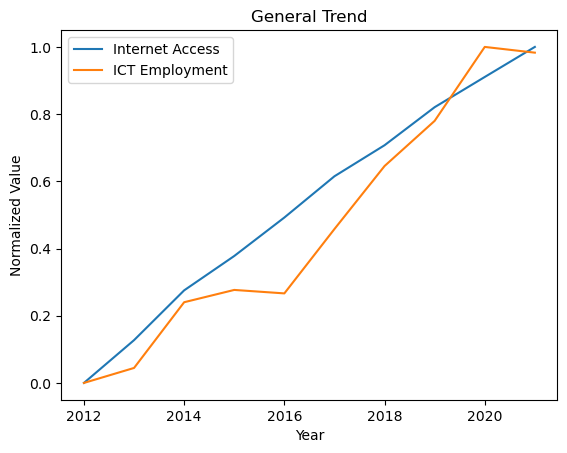

In [10]:
# Min-Max normalization function with adjusted range
def min_max_normalize(series, min_value = 0.00):
    normalized = (series - series.min()) / (series.max() - series.min())
    return normalized * (1 - min_value) + min_value

# Create the mean values of each year
years = df_merge['TIME_PERIOD'].unique()
years.sort()
mean_iaccess = []
mean_ictemp = []
for year in years:
    iaccess = np.mean(df_merge[df_merge['TIME_PERIOD'] == year]['OBS_VALUE_x'])
    ictemp = np.mean(df_merge[df_merge['TIME_PERIOD'] == year]['OBS_VALUE_y'])
    mean_iaccess.append(iaccess)
    mean_ictemp.append(ictemp)

# Normalize the values
mean_iaccess = np.array(mean_iaccess)
mean_ictemp = np.array(mean_ictemp)

mean_iaccess = min_max_normalize(mean_iaccess)
mean_ictemp = min_max_normalize(mean_ictemp)

# Time series analysis of all countries (to get an overview of the trend)
plt.plot(years, mean_iaccess, label='Internet Access')
plt.plot(years, mean_ictemp, label='ICT Employment')
plt.title('General Trend')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

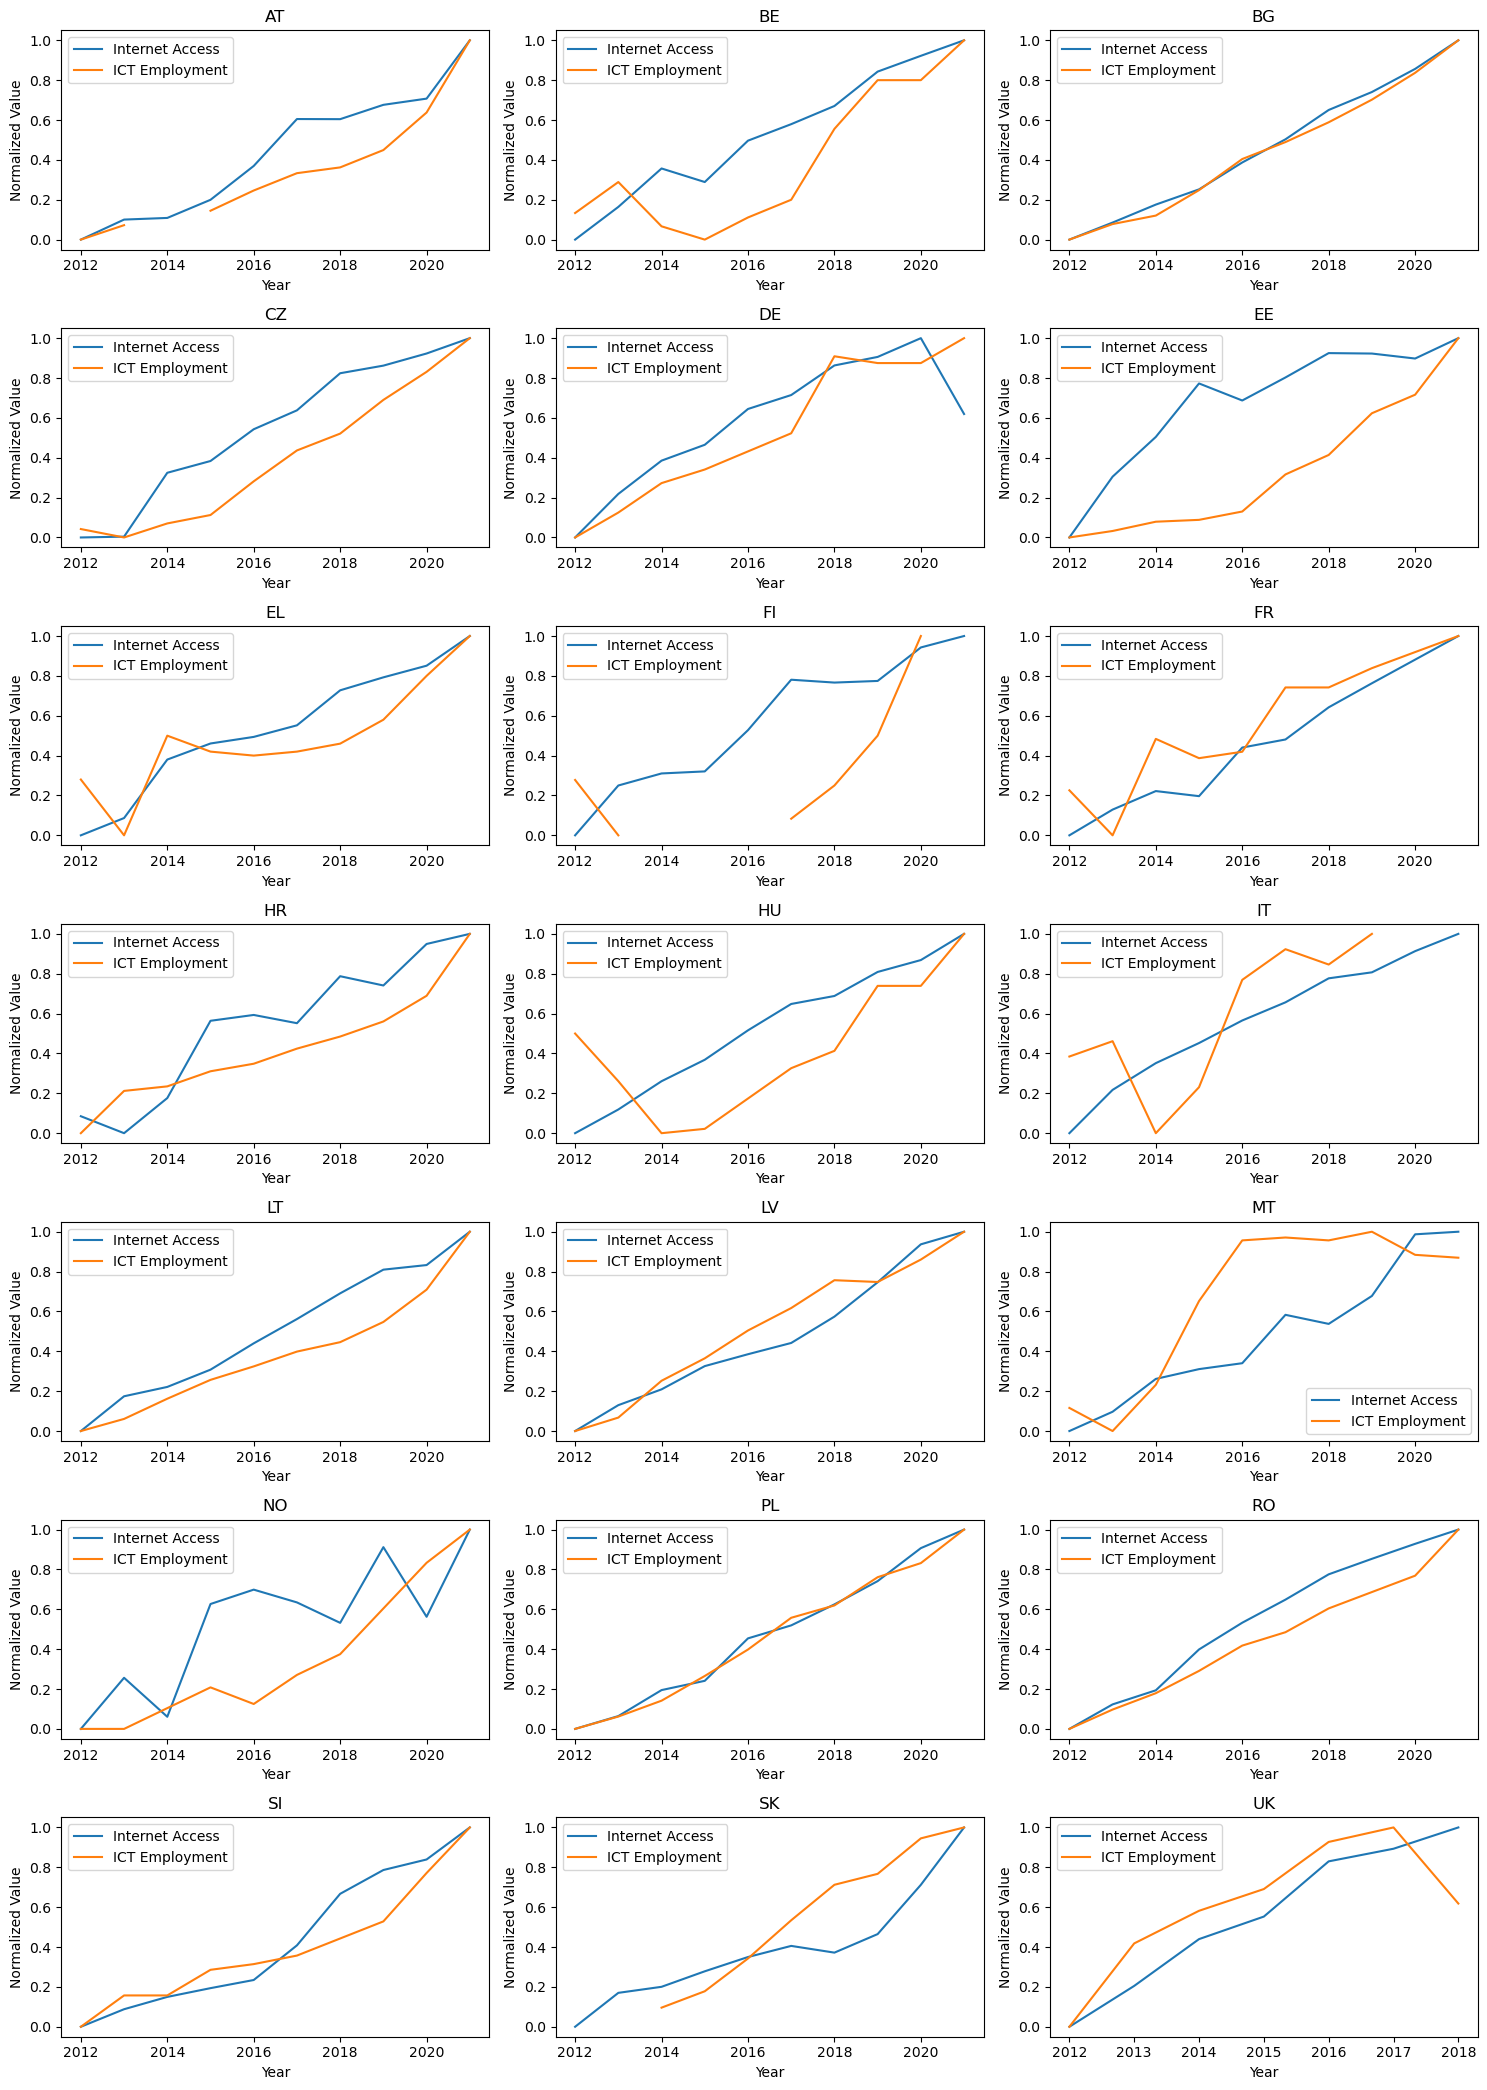

In [8]:
# Determine the number of rows and columns for the subplots
cols = 3
rows = 7
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()

# Time series analysis
i = 0
for country in df_merge['geo'].unique():
    country_data = df_merge[df_merge['geo'] == country]
    
    value_iaccess = country_data['OBS_VALUE_x']
    value_ictemp = country_data['OBS_VALUE_y']
    
    if len(value_iaccess.dropna()) <= 5 or len(value_ictemp.dropna()) <= 5:
        continue
    
    # Normalize the values
    normalized_x = min_max_normalize(value_iaccess)
    normalized_y = min_max_normalize(value_ictemp)
    
    ax = axes[i]
    ax.plot(country_data['TIME_PERIOD'], normalized_x, label='Internet Access')
    ax.plot(country_data['TIME_PERIOD'], normalized_y, label='ICT Employment')

    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Normalized Value')
    ax.legend()
    
    i += 1
    if i >= len(axes):
        break

# Remove unused subplots
for j in range(i, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 3. Analysis
### Country Comparison:

I am going to create a bar chart comparing countries for both variables.
This helps identify countries that deviate from the general trend.

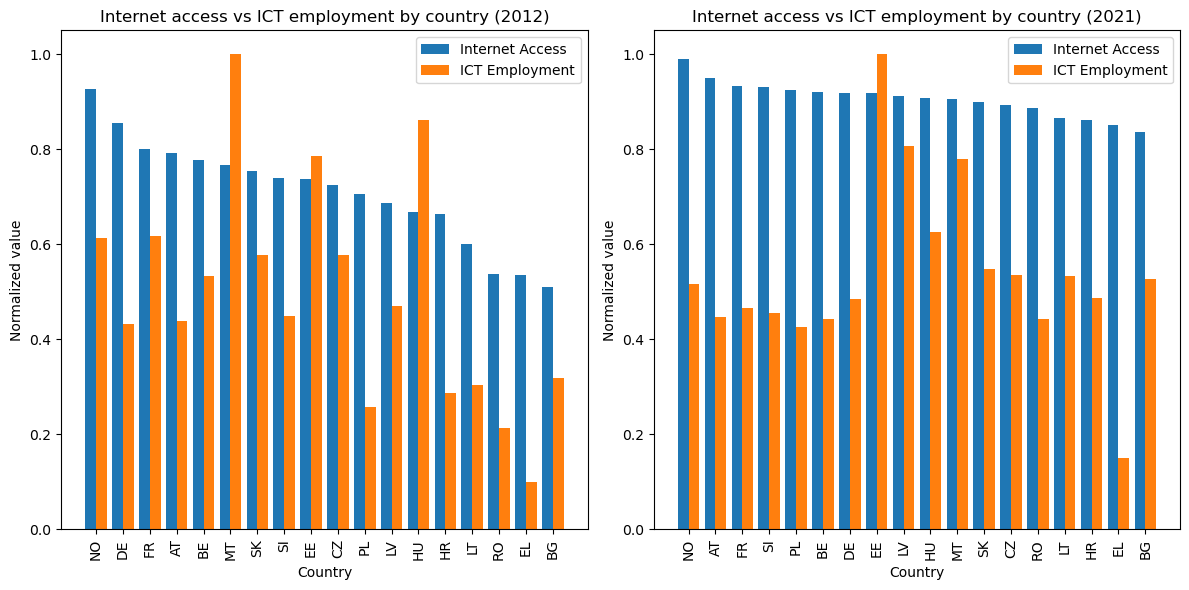

In [15]:
# Select the data of 2011 and 2021
latest_data = df_merge[(df_merge['TIME_PERIOD'] == 2021) & (~pd.isna(df_merge['OBS_VALUE_y']))]
earliest_data = df_merge[(df_merge['TIME_PERIOD'] == 2012) & (~pd.isna(df_merge['OBS_VALUE_y']))]

# Find the common countries in both datasets
common_countries = set(latest_data['geo']).intersection(set(earliest_data['geo']))

# Filter the datasets to include only the common countries
latest_data_common = latest_data[latest_data['geo'].isin(common_countries)]
earliest_data_common = earliest_data[earliest_data['geo'].isin(common_countries)]

# Normalize the ict data
latest_data_common = latest_data_common.copy()
earliest_data_common = earliest_data_common.copy()

latest_data_common['normalized_ict'] = min_max_normalize(latest_data_common['OBS_VALUE_y'], 0.15)
earliest_data_common['normalized_ict'] = min_max_normalize(earliest_data_common['OBS_VALUE_y'], 0.1)

# Divide the iaccess data by 100
latest_data_common['normalized_iaccess'] = latest_data_common['OBS_VALUE_x'] / 100
earliest_data_common['normalized_iaccess'] = earliest_data_common['OBS_VALUE_x'] / 100


# Sort data by normalized internet access (descending)
latest_data_common = latest_data_common.sort_values('OBS_VALUE_x', ascending=False)
earliest_data_common = earliest_data_common.sort_values('OBS_VALUE_x', ascending = False)

# Create a figure for subplots
plt.figure(figsize=(12, 6))

# Create a barplot for 2012
plt.subplot(1, 2, 1)
x = range(len(earliest_data_common))
plt.bar(x, earliest_data_common['normalized_iaccess'], width=0.4, label='Internet Access', align='center')
plt.bar([i + 0.4 for i in x], earliest_data_common['normalized_ict'], width=0.4, label='ICT Employment', align='center')
plt.xticks([i + 0.2 for i in x], earliest_data_common['geo'], rotation=90)
plt.title('Internet access vs ICT employment by country (2012)')
plt.ylabel('Normalized value')
plt.xlabel('Country')
plt.legend()
plt.tight_layout()

# Create a barplot for 2021
plt.subplot(1, 2, 2)
x = range(len(latest_data_common))
plt.bar(x, latest_data_common['normalized_iaccess'], width=0.4, label='Internet Access', align='center')
plt.bar([i + 0.4 for i in x], latest_data_common['normalized_ict'], width=0.4, label='ICT Employment', align='center')
plt.xticks([i + 0.2 for i in x], latest_data_common['geo'], rotation=90)
plt.title('Internet access vs ICT employment by country (2021)')
plt.ylabel('Normalized value')
plt.xlabel('Country')
plt.legend()
plt.tight_layout()

# Show the plots
plt.show()

In [14]:
# Calculate means for 2012
mean_iaccess_2012 = earliest_data_common['OBS_VALUE_x'].mean()
mean_ictemp_2012 = earliest_data_common['OBS_VALUE_y'].mean()

# Calculate means for 2021
mean_iaccess_2021 = latest_data_common['OBS_VALUE_x'].mean()
mean_ictemp_2021 = latest_data_common['OBS_VALUE_y'].mean()

# Print the results
print(f"Mean Internet Access in 2012: {mean_iaccess_2012}")
print(f"Mean ICT Employment in 2012: {mean_ictemp_2012}")
print(f"Mean Internet Access in 2021: {mean_iaccess_2021}")
print(f"Mean ICT Employment in 2021: {mean_ictemp_2021}")

Mean Internet Access in 2012: 71.02277777777778
Mean ICT Employment in 2012: 2.5344444444444445
Mean Internet Access in 2021: 90.56166666666667
Mean ICT Employment in 2021: 3.476111111111111
